![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.models import load_model

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


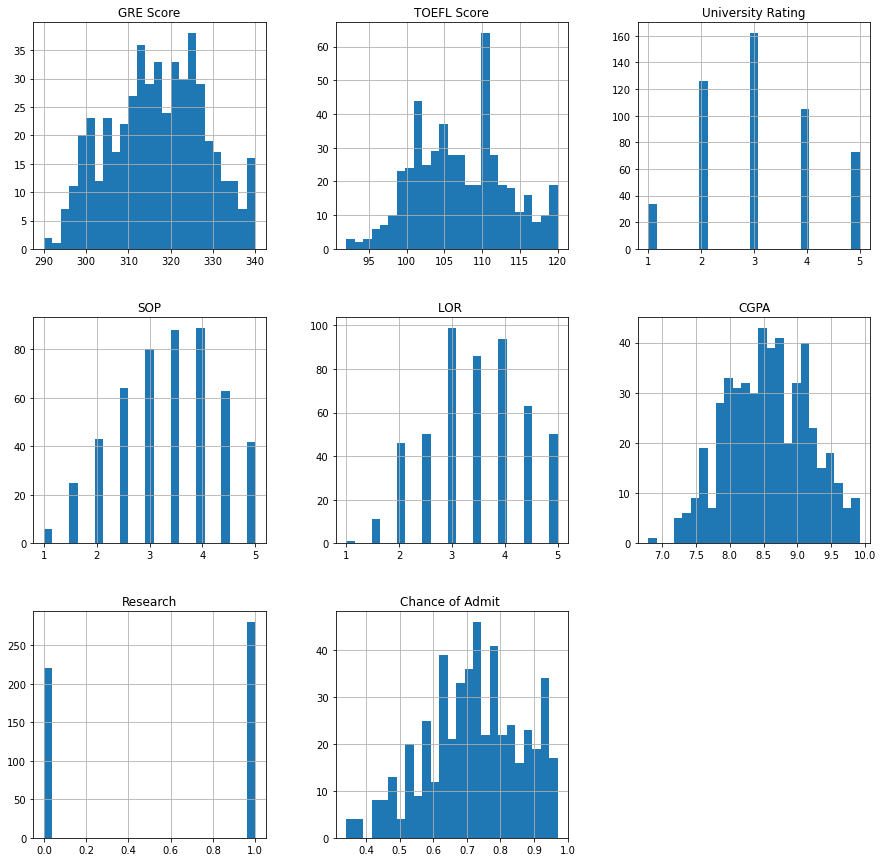

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)


In [8]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

1  output variables


In [9]:
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
EPOCHS = 100
optimizers_list = [
    tf.keras.optimizers.Adadelta(),
    tf.keras.optimizers.Adagrad(),
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adamax(),
    tf.keras.optimizers.Ftrl(),
    tf.keras.optimizers.Nadam(),
    tf.keras.optimizers.RMSprop(), 
    tf.keras.optimizers.SGD()
]

In [12]:
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,))])
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3926 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6070
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3926 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6070
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3926 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6069
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3925 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6069
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3925 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6069
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3925 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6069
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3925 - mae: 0.5824 - val_loss: 0.4226 - val_mae: 0.6069
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3925 - mae: 0.5824 - va

9/9 [==============================] - 0s 4ms/step - loss: 0.3916 - mae: 0.5814 - val_loss: 0.4216 - val_mae: 0.6059
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3916 - mae: 0.5814 - val_loss: 0.4216 - val_mae: 0.6059
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3916 - mae: 0.5814 - val_loss: 0.4215 - val_mae: 0.6058
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3915 - mae: 0.5814 - val_loss: 0.4215 - val_mae: 0.6058
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3915 - mae: 0.5814 - val_loss: 0.4215 - val_mae: 0.6058
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3915 - mae: 0.5813 - val_loss: 0.4215 - val_mae: 0.6058
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3915 - mae: 0.5813 - val_loss: 0.4215 - val_mae: 0.6058
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3915 - mae: 0.5813 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.3759 - mae: 0.5701 - val_loss: 0.3995 - val_mae: 0.5891
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3757 - mae: 0.5699 - val_loss: 0.3993 - val_mae: 0.5889
Epoch 29/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3755 - mae: 0.5698 - val_loss: 0.3990 - val_mae: 0.5887
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3753 - mae: 0.5696 - val_loss: 0.3988 - val_mae: 0.5885
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3752 - mae: 0.5694 - val_loss: 0.3986 - val_mae: 0.5883
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3750 - mae: 0.5692 - val_loss: 0.3984 - val_mae: 0.5881
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3748 - mae: 0.5691 - val_loss: 0.3982 - val_mae: 0.5879
Epoch 34/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3746 - mae: 0.5689 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.3648 - mae: 0.5598 - val_loss: 0.3868 - val_mae: 0.5776
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3646 - mae: 0.5596 - val_loss: 0.3866 - val_mae: 0.5774
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3645 - mae: 0.5595 - val_loss: 0.3864 - val_mae: 0.5773
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3643 - mae: 0.5593 - val_loss: 0.3862 - val_mae: 0.5771
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3642 - mae: 0.5592 - val_loss: 0.3860 - val_mae: 0.5769
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3640 - mae: 0.5590 - val_loss: 0.3859 - val_mae: 0.5767
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3638 - mae: 0.5588 - val_loss: 0.3857 - val_mae: 0.5766
Epoch 97/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3637 - mae: 0.5587 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.0998 - mae: 0.2566 - val_loss: 0.1072 - val_mae: 0.2657
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0952 - mae: 0.2494 - val_loss: 0.1023 - val_mae: 0.2586
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0909 - mae: 0.2425 - val_loss: 0.0977 - val_mae: 0.2515
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0867 - mae: 0.2355 - val_loss: 0.0932 - val_mae: 0.2443
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0827 - mae: 0.2287 - val_loss: 0.0889 - val_mae: 0.2372
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0788 - mae: 0.2219 - val_loss: 0.0848 - val_mae: 0.2306
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0752 - mae: 0.2156 - val_loss: 0.0809 - val_mae: 0.2241
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0717 - mae: 0.2091 - val_loss

9/9 [==============================] - 0s 6ms/step - loss: 0.3160 - mae: 0.5019 - val_loss: 0.3380 - val_mae: 0.5185
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3133 - mae: 0.4987 - val_loss: 0.3355 - val_mae: 0.5157
Epoch 18/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3109 - mae: 0.4959 - val_loss: 0.3331 - val_mae: 0.5129
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3084 - mae: 0.4932 - val_loss: 0.3307 - val_mae: 0.5102
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3060 - mae: 0.4904 - val_loss: 0.3283 - val_mae: 0.5076
Epoch 21/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3037 - mae: 0.4879 - val_loss: 0.3259 - val_mae: 0.5051
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3012 - mae: 0.4853 - val_loss: 0.3235 - val_mae: 0.5027
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2990 - mae: 0.4829 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.1413 - mae: 0.3108 - val_loss: 0.1492 - val_mae: 0.3167
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1382 - mae: 0.3068 - val_loss: 0.1460 - val_mae: 0.3127
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1351 - mae: 0.3027 - val_loss: 0.1428 - val_mae: 0.3087
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1319 - mae: 0.2987 - val_loss: 0.1395 - val_mae: 0.3047
Epoch 83/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1287 - mae: 0.2945 - val_loss: 0.1361 - val_mae: 0.3005
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1255 - mae: 0.2903 - val_loss: 0.1328 - val_mae: 0.2964
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1223 - mae: 0.2861 - val_loss: 0.1294 - val_mae: 0.2923
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1190 - mae: 0.2817 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.4957 - mae: 0.6929 - val_loss: 0.5308 - val_mae: 0.7188
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4948 - mae: 0.6923 - val_loss: 0.5298 - val_mae: 0.7181
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4939 - mae: 0.6917 - val_loss: 0.5288 - val_mae: 0.7175
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4931 - mae: 0.6911 - val_loss: 0.5279 - val_mae: 0.7169
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4922 - mae: 0.6905 - val_loss: 0.5269 - val_mae: 0.7162
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4914 - mae: 0.6899 - val_loss: 0.5260 - val_mae: 0.7156
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4905 - mae: 0.6893 - val_loss: 0.5250 - val_mae: 0.7150
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4897 - mae: 0.6887 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.3531 - mae: 0.5398 - val_loss: 0.3739 - val_mae: 0.5533
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3456 - mae: 0.5310 - val_loss: 0.3665 - val_mae: 0.5442
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3391 - mae: 0.5231 - val_loss: 0.3605 - val_mae: 0.5365
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3336 - mae: 0.5163 - val_loss: 0.3555 - val_mae: 0.5301
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3289 - mae: 0.5105 - val_loss: 0.3512 - val_mae: 0.5247
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3247 - mae: 0.5053 - val_loss: 0.3473 - val_mae: 0.5202
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3207 - mae: 0.5008 - val_loss: 0.3436 - val_mae: 0.5164
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3169 - mae: 0.4966 - val_loss: 0.

9/9 [==============================] - 0s 4ms/step - loss: 0.0561 - mae: 0.1767 - val_loss: 0.0615 - val_mae: 0.1843
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0537 - mae: 0.1715 - val_loss: 0.0590 - val_mae: 0.1787
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0516 - mae: 0.1663 - val_loss: 0.0566 - val_mae: 0.1733
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0495 - mae: 0.1616 - val_loss: 0.0543 - val_mae: 0.1682
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0475 - mae: 0.1568 - val_loss: 0.0522 - val_mae: 0.1633
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0457 - mae: 0.1522 - val_loss: 0.0502 - val_mae: 0.1586
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.1480 - val_loss: 0.0483 - val_mae: 0.1541
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.1439 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.2074 - mae: 0.3909 - val_loss: 0.2195 - val_mae: 0.4002
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2020 - mae: 0.3851 - val_loss: 0.2137 - val_mae: 0.3935
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1972 - mae: 0.3792 - val_loss: 0.2084 - val_mae: 0.3869
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1926 - mae: 0.3736 - val_loss: 0.2036 - val_mae: 0.3807
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1884 - mae: 0.3682 - val_loss: 0.1992 - val_mae: 0.3748
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1844 - mae: 0.3628 - val_loss: 0.1951 - val_mae: 0.3693
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1804 - mae: 0.3577 - val_loss: 0.1911 - val_mae: 0.3641
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1766 - mae: 0.3529 - val_loss

9/9 [==============================] - 0s 5ms/step - loss: 0.0206 - mae: 0.0694 - val_loss: 0.0214 - val_mae: 0.0674
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0206 - mae: 0.0698 - val_loss: 0.0214 - val_mae: 0.0671
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0205 - mae: 0.0692 - val_loss: 0.0213 - val_mae: 0.0669
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0206 - mae: 0.0695 - val_loss: 0.0213 - val_mae: 0.0669
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0205 - mae: 0.0691 - val_loss: 0.0213 - val_mae: 0.0667
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0205 - mae: 0.0689 - val_loss: 0.0214 - val_mae: 0.0668
Epoch 100/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0206 - mae: 0.0693 - val_loss: 0.0215 - val_mae: 0.0678
Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3911 - mae: 0.5805 - val_los

9/9 [==============================] - 0s 4ms/step - loss: 0.3612 - mae: 0.5514 - val_loss: 0.3874 - val_mae: 0.5722
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3607 - mae: 0.5509 - val_loss: 0.3869 - val_mae: 0.5717
Epoch 59/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3602 - mae: 0.5504 - val_loss: 0.3864 - val_mae: 0.5711
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3598 - mae: 0.5499 - val_loss: 0.3859 - val_mae: 0.5706
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3593 - mae: 0.5495 - val_loss: 0.3854 - val_mae: 0.5701
Epoch 62/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3588 - mae: 0.5490 - val_loss: 0.3849 - val_mae: 0.5696
Epoch 63/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3584 - mae: 0.5485 - val_loss: 0.3844 - val_mae: 0.5691
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3579 - mae: 0.5480 - val_loss

<AxesSubplot:>

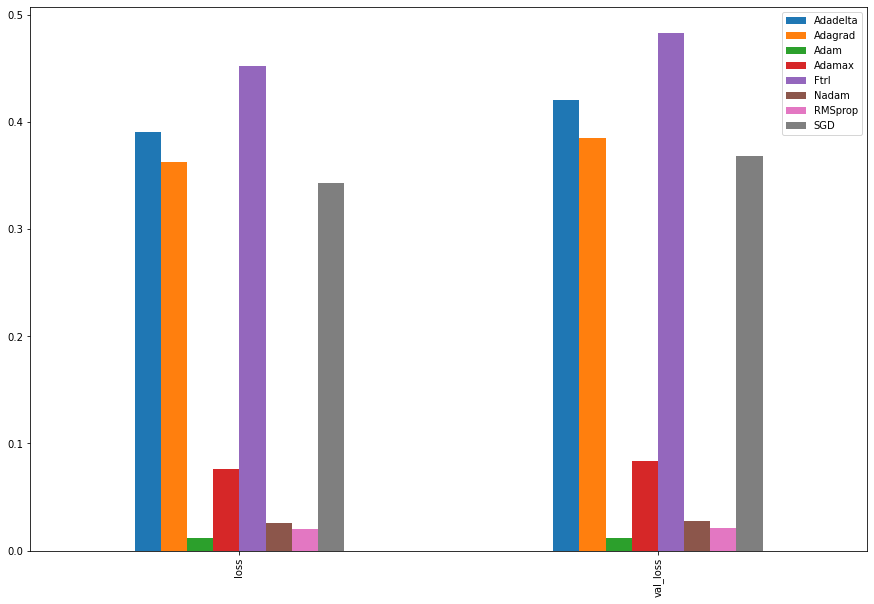

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

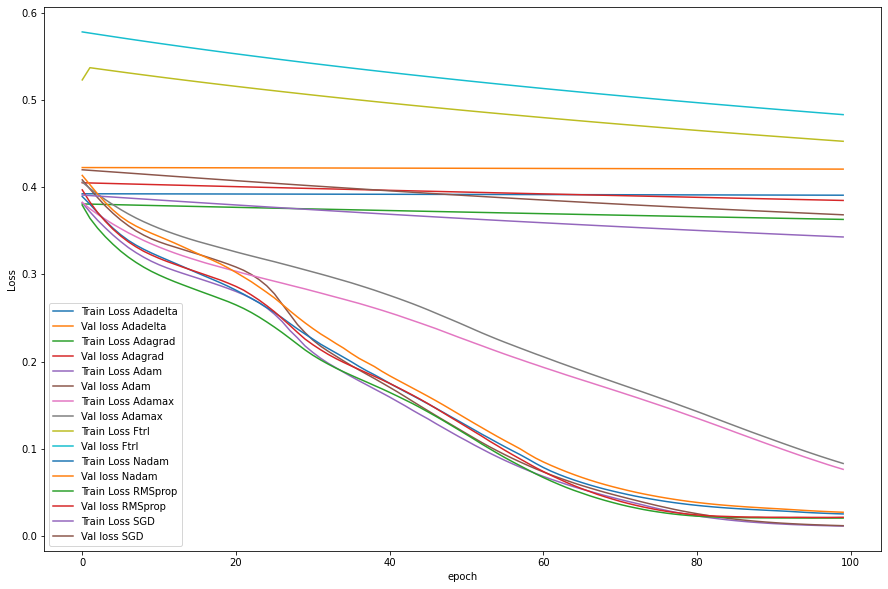

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [15]:
results

{'Adadelta': {'loss': 0.39093610644340515, 'val_loss': 0.42086538672447205},
 'Adagrad': {'loss': 0.36316511034965515, 'val_loss': 0.3849254548549652},
 'Adam': {'loss': 0.011359043419361115, 'val_loss': 0.011827331967651844},
 'Adamax': {'loss': 0.07646215707063675, 'val_loss': 0.08318424969911575},
 'Ftrl': {'loss': 0.4527949392795563, 'val_loss': 0.4833577275276184},
 'Nadam': {'loss': 0.02529868483543396, 'val_loss': 0.02724284864962101},
 'RMSprop': {'loss': 0.020550373941659927, 'val_loss': 0.021481480449438095},
 'SGD': {'loss': 0.34301599860191345, 'val_loss': 0.3684661388397217}}

In [16]:
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,))])
    model.compile(loss='mae',optimizer=optimizer,metrics=['mse'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5859 - mse: 0.3978 - val_loss: 0.6091 - val_mse: 0.4263
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5859 - mse: 0.3978 - val_loss: 0.6091 - val_mse: 0.4263
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5859 - mse: 0.3977 - val_loss: 0.6091 - val_mse: 0.4262
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5859 - mse: 0.3977 - val_loss: 0.6091 - val_mse: 0.4262
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5858 - mse: 0.3977 - val_loss: 0.6091 - val_mse: 0.4262
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5858 - mse: 0.3977 - val_loss: 0.6090 - val_mse: 0.4262
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5858 - mse: 0.3977 - val_loss: 0.6090 - val_mse: 0.4262
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5858 - mse: 0.3977 - va

9/9 [==============================] - 0s 5ms/step - loss: 0.5848 - mse: 0.3967 - val_loss: 0.6080 - val_mse: 0.4251
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5848 - mse: 0.3967 - val_loss: 0.6079 - val_mse: 0.4251
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5848 - mse: 0.3967 - val_loss: 0.6079 - val_mse: 0.4251
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5848 - mse: 0.3967 - val_loss: 0.6079 - val_mse: 0.4251
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5848 - mse: 0.3967 - val_loss: 0.6079 - val_mse: 0.4250
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5847 - mse: 0.3966 - val_loss: 0.6079 - val_mse: 0.4250
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5847 - mse: 0.3966 - val_loss: 0.6078 - val_mse: 0.4250
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5847 - mse: 0.3966 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.5788 - mse: 0.3901 - val_loss: 0.6036 - val_mse: 0.4200
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5786 - mse: 0.3899 - val_loss: 0.6034 - val_mse: 0.4199
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5785 - mse: 0.3898 - val_loss: 0.6032 - val_mse: 0.4197
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5783 - mse: 0.3896 - val_loss: 0.6030 - val_mse: 0.4195
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5782 - mse: 0.3894 - val_loss: 0.6029 - val_mse: 0.4193
Epoch 32/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5780 - mse: 0.3893 - val_loss: 0.6027 - val_mse: 0.4192
Epoch 33/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5778 - mse: 0.3891 - val_loss: 0.6025 - val_mse: 0.4190
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5777 - mse: 0.3890 - val_loss

9/9 [==============================] - 0s 5ms/step - loss: 0.5690 - mse: 0.3804 - val_loss: 0.5932 - val_mse: 0.4094
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.3803 - val_loss: 0.5930 - val_mse: 0.4093
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5687 - mse: 0.3801 - val_loss: 0.5928 - val_mse: 0.4091
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.3800 - val_loss: 0.5927 - val_mse: 0.4089
Epoch 94/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5684 - mse: 0.3798 - val_loss: 0.5925 - val_mse: 0.4088
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5683 - mse: 0.3797 - val_loss: 0.5924 - val_mse: 0.4086
Epoch 96/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5681 - mse: 0.3795 - val_loss: 0.5922 - val_mse: 0.4085
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5680 - mse: 0.3794 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.0748 - mse: 0.0262 - val_loss: 0.0722 - val_mse: 0.0270
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0749 - mse: 0.0262 - val_loss: 0.0716 - val_mse: 0.0270
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0746 - mse: 0.0262 - val_loss: 0.0716 - val_mse: 0.0270
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0746 - mse: 0.0262 - val_loss: 0.0717 - val_mse: 0.0270
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0747 - mse: 0.0262 - val_loss: 0.0718 - val_mse: 0.0270
Epoch 58/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0759 - mse: 0.0263 - val_loss: 0.0720 - val_mse: 0.0270
Epoch 59/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0750 - mse: 0.0262 - val_loss: 0.0734 - val_mse: 0.0271
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0746 - mse: 0.0262 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.5044 - mse: 0.3218 - val_loss: 0.5248 - val_mse: 0.3475
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5018 - mse: 0.3196 - val_loss: 0.5224 - val_mse: 0.3454
Epoch 18/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4993 - mse: 0.3174 - val_loss: 0.5201 - val_mse: 0.3434
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4969 - mse: 0.3154 - val_loss: 0.5179 - val_mse: 0.3415
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4947 - mse: 0.3134 - val_loss: 0.5158 - val_mse: 0.3396
Epoch 21/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4924 - mse: 0.3115 - val_loss: 0.5137 - val_mse: 0.3377
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4903 - mse: 0.3096 - val_loss: 0.5118 - val_mse: 0.3359
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4880 - mse: 0.3077 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.3232 - mse: 0.1540 - val_loss: 0.3372 - val_mse: 0.1669
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3187 - mse: 0.1503 - val_loss: 0.3322 - val_mse: 0.1628
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3143 - mse: 0.1467 - val_loss: 0.3273 - val_mse: 0.1588
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3098 - mse: 0.1431 - val_loss: 0.3224 - val_mse: 0.1548
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3054 - mse: 0.1396 - val_loss: 0.3174 - val_mse: 0.1509
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3009 - mse: 0.1361 - val_loss: 0.3125 - val_mse: 0.1471
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2964 - mse: 0.1328 - val_loss: 0.3076 - val_mse: 0.1434
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2920 - mse: 0.1294 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.7017 - mse: 0.5116 - val_loss: 0.7294 - val_mse: 0.5499
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7012 - mse: 0.5110 - val_loss: 0.7290 - val_mse: 0.5492
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7008 - mse: 0.5104 - val_loss: 0.7285 - val_mse: 0.5485
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7003 - mse: 0.5098 - val_loss: 0.7281 - val_mse: 0.5479
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6999 - mse: 0.5092 - val_loss: 0.7276 - val_mse: 0.5472
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6995 - mse: 0.5086 - val_loss: 0.7272 - val_mse: 0.5466
Epoch 48/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6990 - mse: 0.5080 - val_loss: 0.7267 - val_mse: 0.5460
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6986 - mse: 0.5074 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.4552 - mse: 0.2830 - val_loss: 0.4738 - val_mse: 0.3036
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4364 - mse: 0.2644 - val_loss: 0.4522 - val_mse: 0.2808
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4137 - mse: 0.2400 - val_loss: 0.4247 - val_mse: 0.2494
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3883 - mse: 0.2115 - val_loss: 0.3927 - val_mse: 0.2149
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3622 - mse: 0.1859 - val_loss: 0.3637 - val_mse: 0.1880
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3388 - mse: 0.1654 - val_loss: 0.3376 - val_mse: 0.1673
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3171 - mse: 0.1496 - val_loss: 0.3152 - val_mse: 0.1513
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2973 - mse: 0.1352 - val_loss: 0.

9/9 [==============================] - 0s 4ms/step - loss: 0.0674 - mse: 0.0201 - val_loss: 0.0641 - val_mse: 0.0199
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0666 - mse: 0.0195 - val_loss: 0.0639 - val_mse: 0.0195
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0659 - mse: 0.0191 - val_loss: 0.0626 - val_mse: 0.0190
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0655 - mse: 0.0187 - val_loss: 0.0622 - val_mse: 0.0187
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0648 - mse: 0.0185 - val_loss: 0.0614 - val_mse: 0.0184
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0646 - mse: 0.0183 - val_loss: 0.0610 - val_mse: 0.0183
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0640 - mse: 0.0181 - val_loss: 0.0606 - val_mse: 0.0181
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0633 - mse: 0.0180 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.4205 - mse: 0.2533 - val_loss: 0.4435 - val_mse: 0.2760
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4147 - mse: 0.2464 - val_loss: 0.4370 - val_mse: 0.2679
Epoch 33/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4086 - mse: 0.2392 - val_loss: 0.4298 - val_mse: 0.2590
Epoch 34/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4021 - mse: 0.2313 - val_loss: 0.4220 - val_mse: 0.2493
Epoch 35/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3955 - mse: 0.2231 - val_loss: 0.4142 - val_mse: 0.2401
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3888 - mse: 0.2153 - val_loss: 0.4063 - val_mse: 0.2307
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3820 - mse: 0.2070 - val_loss: 0.3982 - val_mse: 0.2219
Epoch 38/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3752 - mse: 0.2000 - val_loss

9/9 [==============================] - 0s 4ms/step - loss: 0.0782 - mse: 0.0268 - val_loss: 0.0757 - val_mse: 0.0277
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0777 - mse: 0.0267 - val_loss: 0.0749 - val_mse: 0.0276
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0772 - mse: 0.0266 - val_loss: 0.0743 - val_mse: 0.0275
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0768 - mse: 0.0265 - val_loss: 0.0742 - val_mse: 0.0274
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0764 - mse: 0.0265 - val_loss: 0.0739 - val_mse: 0.0274
Epoch 99/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0764 - mse: 0.0264 - val_loss: 0.0736 - val_mse: 0.0273
Epoch 100/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0760 - mse: 0.0264 - val_loss: 0.0740 - val_mse: 0.0273
Epoch 1/100
9/9 [==============================] - 0s 13ms/step - loss: 0.5841 - mse: 0.3972 - val_los

9/9 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.3714 - val_loss: 0.5803 - val_mse: 0.4006
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5563 - mse: 0.3710 - val_loss: 0.5798 - val_mse: 0.4002
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5558 - mse: 0.3706 - val_loss: 0.5793 - val_mse: 0.3997
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5553 - mse: 0.3702 - val_loss: 0.5788 - val_mse: 0.3993
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.3698 - val_loss: 0.5784 - val_mse: 0.3988
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.3694 - val_loss: 0.5779 - val_mse: 0.3984
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5540 - mse: 0.3689 - val_loss: 0.5774 - val_mse: 0.3979
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5535 - mse: 0.3685 - val_loss

<AxesSubplot:>

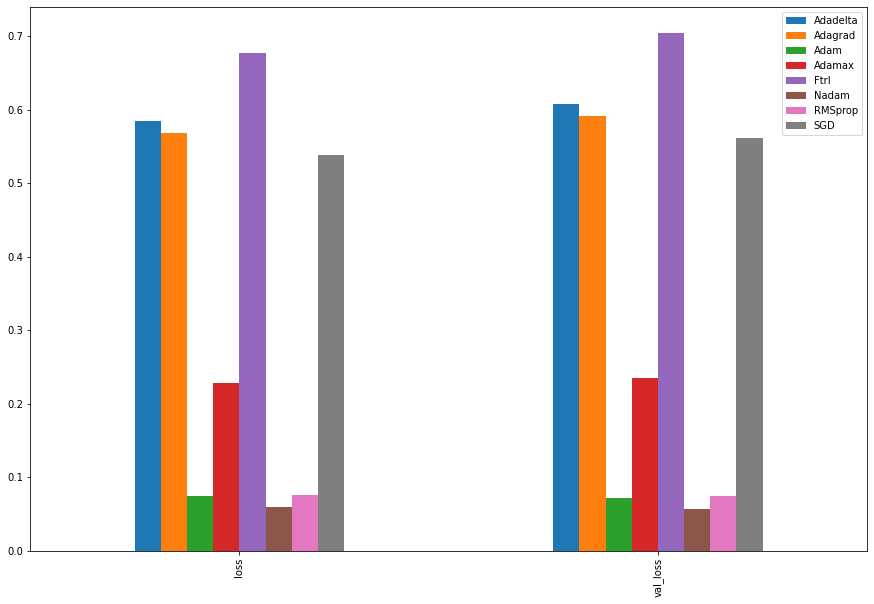

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

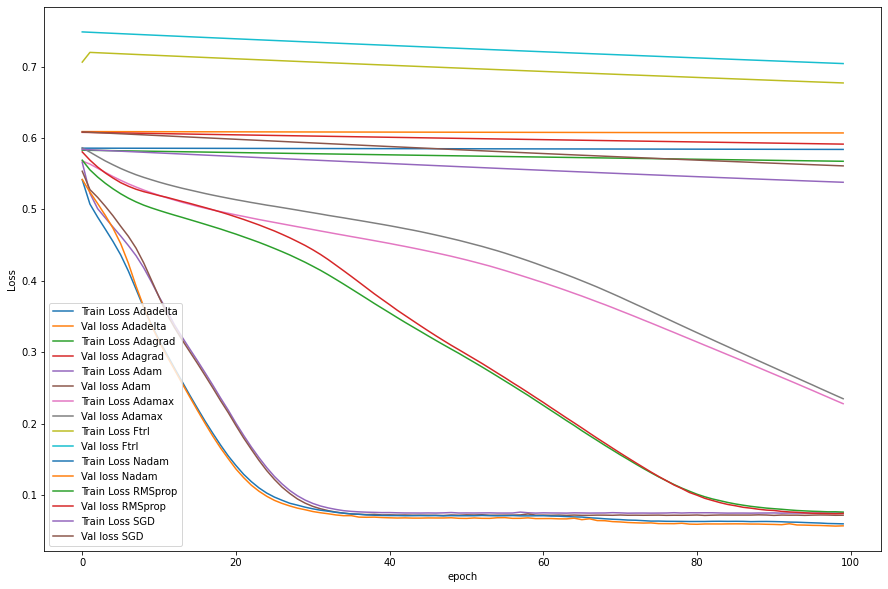

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [19]:
results

{'Adadelta': {'loss': 0.5841444730758667, 'val_loss': 0.6072335243225098},
 'Adagrad': {'loss': 0.5675398111343384, 'val_loss': 0.5915725827217102},
 'Adam': {'loss': 0.07475662231445312, 'val_loss': 0.0716029480099678},
 'Adamax': {'loss': 0.2278362214565277, 'val_loss': 0.23482172191143036},
 'Ftrl': {'loss': 0.6772885322570801, 'val_loss': 0.7044476270675659},
 'Nadam': {'loss': 0.05949201062321663, 'val_loss': 0.056696221232414246},
 'RMSprop': {'loss': 0.0759851485490799, 'val_loss': 0.07402042299509048},
 'SGD': {'loss': 0.5381141901016235, 'val_loss': 0.5610882639884949}}

In [20]:
#val_loss adam
results1mae = 0.009343213401734829

In [21]:
#val_loss Nadam
results1mse =0.07165121287107

En cuanto al optimizador se seleccionaria el Nadam para mae y adam para mse ya que obtiene mejor desempeño en validación. 
Inicialmente se corre el modelo con 50 epocas y notamos que siguen bajando los valores de mse y mae, se prueba con 100 y visualizamos que la curva se aplana para los mejores optimizadores. 
El mejor desempeño es: results1mse =0.07165121287107 con MSE Y results1mae = 0.009343213401734829 para MAE

De igual manera vemos que no hay overfiftin ya que los valores de loss en training y test son similares. 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [22]:
# Celda 2
EPOCHS2 = 50
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,)),
    keras.layers.Dense(64, activation=tf.nn.relu)])
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS2,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS2 - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS2 - 1]

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4219 - mae: 0.6170 - val_loss: 0.4546 - val_mae: 0.6431
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4218 - mae: 0.6170 - val_loss: 0.4545 - val_mae: 0.6430
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4217 - mae: 0.6169 - val_loss: 0.4544 - val_mae: 0.6430
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4217 - mae: 0.6168 - val_loss: 0.4543 - val_mae: 0.6429
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4216 - mae: 0.6168 - val_loss: 0.4542 - val_mae: 0.6428
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4215 - mae: 0.6167 - val_loss: 0.4541 - val_mae: 0.6427
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4214 - mae: 0.6166 - val_loss: 0.4541 - val_mae: 0.6427
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4214 - mae: 0.6165 - val_loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.4293 - mae: 0.6236 - val_loss: 0.4606 - val_mae: 0.6478
Epoch 15/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4287 - mae: 0.6231 - val_loss: 0.4600 - val_mae: 0.6472
Epoch 16/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4281 - mae: 0.6226 - val_loss: 0.4593 - val_mae: 0.6467
Epoch 17/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4276 - mae: 0.6221 - val_loss: 0.4587 - val_mae: 0.6461
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4270 - mae: 0.6215 - val_loss: 0.4581 - val_mae: 0.6456
Epoch 19/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4264 - mae: 0.6210 - val_loss: 0.4574 - val_mae: 0.6450
Epoch 20/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4259 - mae: 0.6205 - val_loss: 0.4568 - val_mae: 0.6445
Epoch 21/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4253 - mae: 0.6200 - val_loss: 0.456

9/9 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0522 - val_loss: 0.0050 - val_mae: 0.0543
Epoch 28/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0522 - val_loss: 0.0046 - val_mae: 0.0518
Epoch 29/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0046 - mae: 0.0510 - val_loss: 0.0045 - val_mae: 0.0510
Epoch 30/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0509 - val_loss: 0.0046 - val_mae: 0.0518
Epoch 31/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0509 - val_loss: 0.0045 - val_mae: 0.0511
Epoch 32/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0505 - val_loss: 0.0044 - val_mae: 0.0501
Epoch 33/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0497 - val_loss: 0.0044 - val_mae: 0.0499
Epoch 34/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0507 - val_loss: 0.004

9/9 [==============================] - 0s 4ms/step - loss: 0.0193 - mae: 0.1105 - val_loss: 0.0201 - val_mae: 0.1145
Epoch 41/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0187 - mae: 0.1088 - val_loss: 0.0195 - val_mae: 0.1125
Epoch 42/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0181 - mae: 0.1071 - val_loss: 0.0188 - val_mae: 0.1105
Epoch 43/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0176 - mae: 0.1054 - val_loss: 0.0183 - val_mae: 0.1088
Epoch 44/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0171 - mae: 0.1039 - val_loss: 0.0178 - val_mae: 0.1071
Epoch 45/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0166 - mae: 0.1024 - val_loss: 0.0173 - val_mae: 0.1055
Epoch 46/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0162 - mae: 0.1009 - val_loss: 0.0167 - val_mae: 0.1035
Epoch 47/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0157 - mae: 0.0994 - val_loss: 0.016

Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0131 - mae: 0.0912 - val_loss: 0.0111 - val_mae: 0.0831
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0102 - mae: 0.0805 - val_loss: 0.0088 - val_mae: 0.0725
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0086 - mae: 0.0737 - val_loss: 0.0077 - val_mae: 0.0676
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0074 - mae: 0.0678 - val_loss: 0.0070 - val_mae: 0.0643
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0069 - mae: 0.0654 - val_loss: 0.0065 - val_mae: 0.0625
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0063 - mae: 0.0623 - val_loss: 0.0059 - val_mae: 0.0586
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0060 - mae: 0.0606 - val_loss: 0.0061 - val_mae: 0.0606
Epoch 11/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0057 - mae: 0.0588 - val_loss:

9/9 [==============================] - 0s 4ms/step - loss: 0.0122 - mae: 0.0876 - val_loss: 0.0127 - val_mae: 0.0891
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0111 - mae: 0.0842 - val_loss: 0.0112 - val_mae: 0.0817
Epoch 19/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0104 - mae: 0.0802 - val_loss: 0.0110 - val_mae: 0.0819
Epoch 20/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0095 - mae: 0.0765 - val_loss: 0.0099 - val_mae: 0.0775
Epoch 21/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0088 - mae: 0.0744 - val_loss: 0.0094 - val_mae: 0.0737
Epoch 22/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0085 - mae: 0.0720 - val_loss: 0.0088 - val_mae: 0.0721
Epoch 23/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0080 - mae: 0.0704 - val_loss: 0.0085 - val_mae: 0.0697
Epoch 24/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0075 - mae: 0.0683 - val_loss: 0.007

9/9 [==============================] - 0s 4ms/step - loss: 0.3725 - mae: 0.5687 - val_loss: 0.3999 - val_mae: 0.5919
Epoch 31/50
9/9 [==============================] - 0s 5ms/step - loss: 0.3705 - mae: 0.5667 - val_loss: 0.3978 - val_mae: 0.5898
Epoch 32/50
9/9 [==============================] - 0s 5ms/step - loss: 0.3685 - mae: 0.5647 - val_loss: 0.3957 - val_mae: 0.5877
Epoch 33/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3665 - mae: 0.5627 - val_loss: 0.3936 - val_mae: 0.5856
Epoch 34/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3646 - mae: 0.5606 - val_loss: 0.3915 - val_mae: 0.5834
Epoch 35/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3626 - mae: 0.5586 - val_loss: 0.3894 - val_mae: 0.5813
Epoch 36/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3607 - mae: 0.5566 - val_loss: 0.3873 - val_mae: 0.5792
Epoch 37/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3587 - mae: 0.5545 - val_loss: 0.385

<AxesSubplot:>

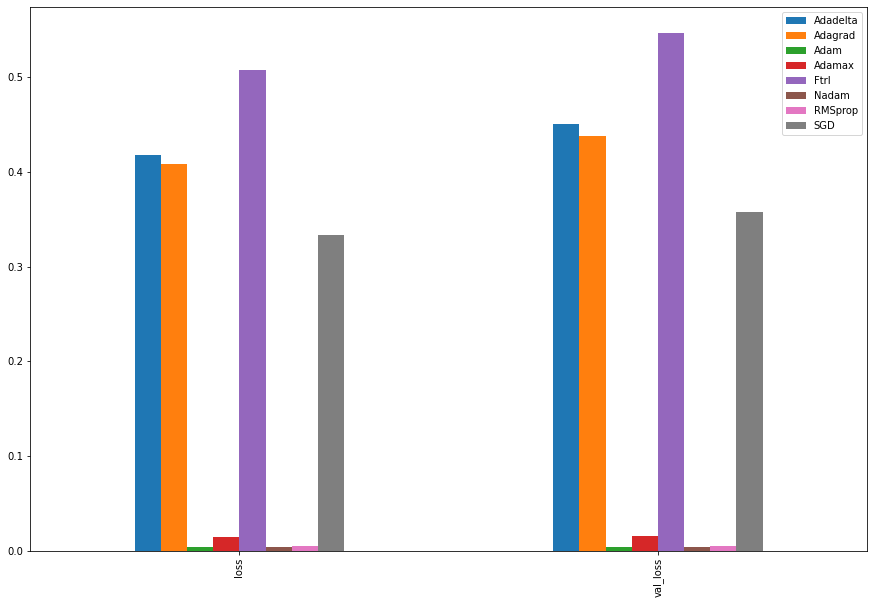

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

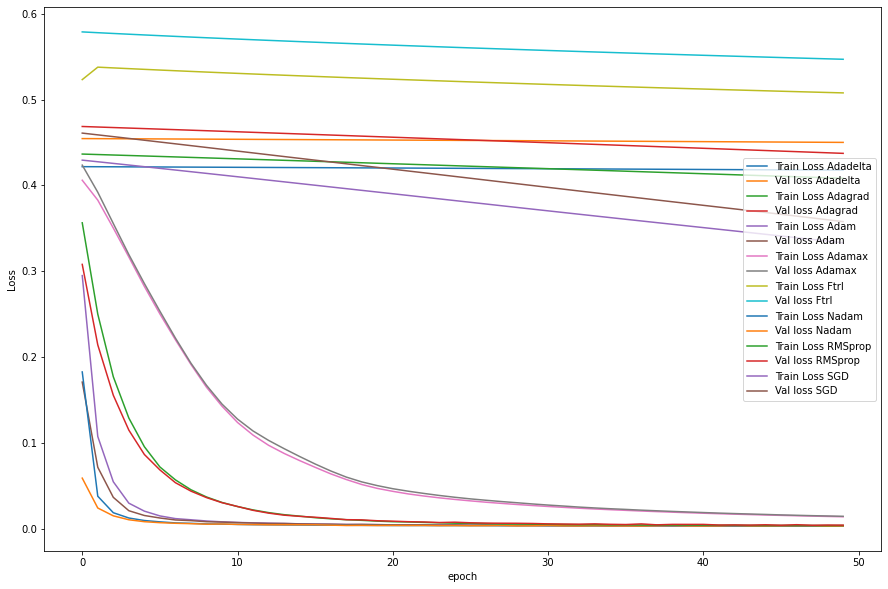

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [25]:
results

{'Adadelta': {'loss': 0.4178200960159302, 'val_loss': 0.450130432844162},
 'Adagrad': {'loss': 0.4083676040172577, 'val_loss': 0.43737849593162537},
 'Adam': {'loss': 0.003939856309443712, 'val_loss': 0.003975209780037403},
 'Adamax': {'loss': 0.014561663381755352, 'val_loss': 0.015102255158126354},
 'Ftrl': {'loss': 0.5077150464057922, 'val_loss': 0.5468379259109497},
 'Nadam': {'loss': 0.0037101719062775373, 'val_loss': 0.003873458132147789},
 'RMSprop': {'loss': 0.0044536530040204525, 'val_loss': 0.004808529745787382},
 'SGD': {'loss': 0.33330008387565613, 'val_loss': 0.357952743768692}}

In [26]:
results2mae=0.004058503080159426

In [27]:
# Celda 2
EPOCHS2 = 50
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,)),
    keras.layers.Dense(64, activation=tf.nn.relu)])
    model.compile(loss='mae',optimizer=optimizer,metrics=['mse'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS2,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS2 - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS2 - 1]

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6103 - mse: 0.4159 - val_loss: 0.6360 - val_mse: 0.4489
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6103 - mse: 0.4159 - val_loss: 0.6359 - val_mse: 0.4489
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6102 - mse: 0.4158 - val_loss: 0.6359 - val_mse: 0.4488
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6102 - mse: 0.4158 - val_loss: 0.6358 - val_mse: 0.4488
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.4157 - val_loss: 0.6357 - val_mse: 0.4487
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6101 - mse: 0.4156 - val_loss: 0.6357 - val_mse: 0.4486
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6100 - mse: 0.4156 - val_loss: 0.6356 - val_mse: 0.4486
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6099 - mse: 0.4155 - val_loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.6054 - mse: 0.4084 - val_loss: 0.6277 - val_mse: 0.4355
Epoch 15/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6047 - mse: 0.4078 - val_loss: 0.6270 - val_mse: 0.4349
Epoch 16/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6041 - mse: 0.4071 - val_loss: 0.6264 - val_mse: 0.4342
Epoch 17/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6035 - mse: 0.4065 - val_loss: 0.6257 - val_mse: 0.4335
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6029 - mse: 0.4059 - val_loss: 0.6250 - val_mse: 0.4328
Epoch 19/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6023 - mse: 0.4052 - val_loss: 0.6244 - val_mse: 0.4321
Epoch 20/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6017 - mse: 0.4046 - val_loss: 0.6237 - val_mse: 0.4313
Epoch 21/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6010 - mse: 0.4040 - val_loss: 0.623

9/9 [==============================] - 0s 4ms/step - loss: 0.0550 - mse: 0.0125 - val_loss: 0.0536 - val_mse: 0.0125
Epoch 28/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0547 - mse: 0.0126 - val_loss: 0.0529 - val_mse: 0.0123
Epoch 29/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0545 - mse: 0.0124 - val_loss: 0.0530 - val_mse: 0.0124
Epoch 30/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0553 - mse: 0.0125 - val_loss: 0.0531 - val_mse: 0.0124
Epoch 31/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0548 - mse: 0.0127 - val_loss: 0.0530 - val_mse: 0.0123
Epoch 32/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0552 - mse: 0.0124 - val_loss: 0.0518 - val_mse: 0.0123
Epoch 33/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0569 - mse: 0.0128 - val_loss: 0.0554 - val_mse: 0.0126
Epoch 34/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0544 - mse: 0.0124 - val_loss: 0.052

9/9 [==============================] - 0s 4ms/step - loss: 0.0913 - mse: 0.0144 - val_loss: 0.0916 - val_mse: 0.0140
Epoch 41/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0895 - mse: 0.0138 - val_loss: 0.0897 - val_mse: 0.0134
Epoch 42/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0879 - mse: 0.0134 - val_loss: 0.0883 - val_mse: 0.0129
Epoch 43/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0863 - mse: 0.0129 - val_loss: 0.0866 - val_mse: 0.0125
Epoch 44/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0848 - mse: 0.0125 - val_loss: 0.0849 - val_mse: 0.0120
Epoch 45/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0834 - mse: 0.0122 - val_loss: 0.0831 - val_mse: 0.0115
Epoch 46/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0820 - mse: 0.0118 - val_loss: 0.0821 - val_mse: 0.0112
Epoch 47/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0807 - mse: 0.0114 - val_loss: 0.080

Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0795 - mse: 0.0108 - val_loss: 0.0750 - val_mse: 0.0087
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0715 - mse: 0.0088 - val_loss: 0.0656 - val_mse: 0.0073
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0638 - mse: 0.0072 - val_loss: 0.0618 - val_mse: 0.0067
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0633 - mse: 0.0070 - val_loss: 0.0733 - val_mse: 0.0075
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0598 - mse: 0.0063 - val_loss: 0.0597 - val_mse: 0.0057
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0583 - mse: 0.0058 - val_loss: 0.0545 - val_mse: 0.0051
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0524 - mse: 0.0052 - val_loss: 0.0529 - val_mse: 0.0048
Epoch 11/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - mse: 0.0051 - val_loss:

9/9 [==============================] - 0s 3ms/step - loss: 0.0891 - mse: 0.0134 - val_loss: 0.0853 - val_mse: 0.0122
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0857 - mse: 0.0126 - val_loss: 0.0810 - val_mse: 0.0111
Epoch 19/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0825 - mse: 0.0116 - val_loss: 0.0788 - val_mse: 0.0105
Epoch 20/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0792 - mse: 0.0109 - val_loss: 0.0763 - val_mse: 0.0098
Epoch 21/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0763 - mse: 0.0102 - val_loss: 0.0746 - val_mse: 0.0093
Epoch 22/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0734 - mse: 0.0094 - val_loss: 0.0747 - val_mse: 0.0092
Epoch 23/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0723 - mse: 0.0091 - val_loss: 0.0695 - val_mse: 0.0083
Epoch 24/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0691 - mse: 0.0085 - val_loss: 0.068

9/9 [==============================] - 0s 5ms/step - loss: 0.5324 - mse: 0.3446 - val_loss: 0.5523 - val_mse: 0.3695
Epoch 31/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5302 - mse: 0.3427 - val_loss: 0.5500 - val_mse: 0.3675
Epoch 32/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5281 - mse: 0.3407 - val_loss: 0.5478 - val_mse: 0.3655
Epoch 33/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5259 - mse: 0.3389 - val_loss: 0.5456 - val_mse: 0.3635
Epoch 34/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5237 - mse: 0.3370 - val_loss: 0.5434 - val_mse: 0.3615
Epoch 35/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5216 - mse: 0.3351 - val_loss: 0.5412 - val_mse: 0.3595
Epoch 36/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5195 - mse: 0.3332 - val_loss: 0.5390 - val_mse: 0.3576
Epoch 37/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5173 - mse: 0.3314 - val_loss: 0.536

<AxesSubplot:>

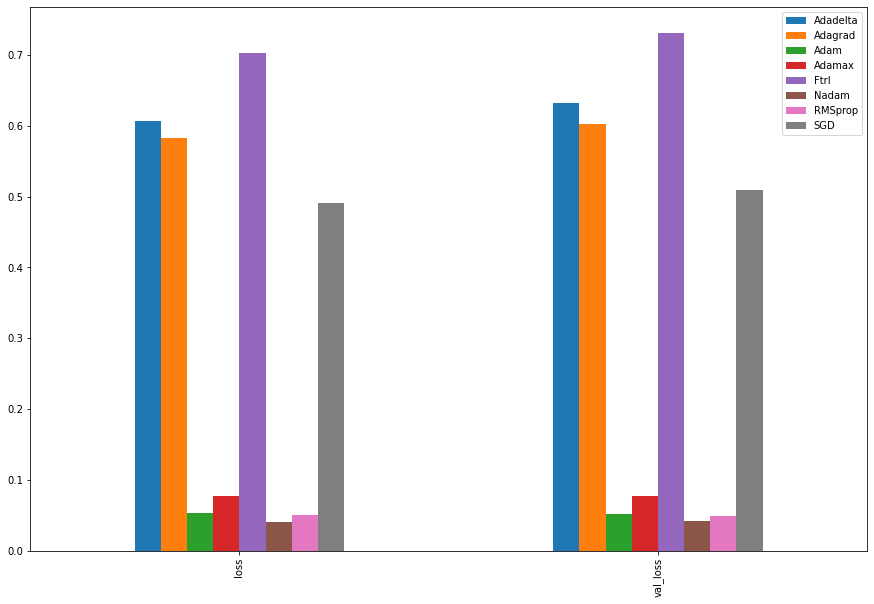

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

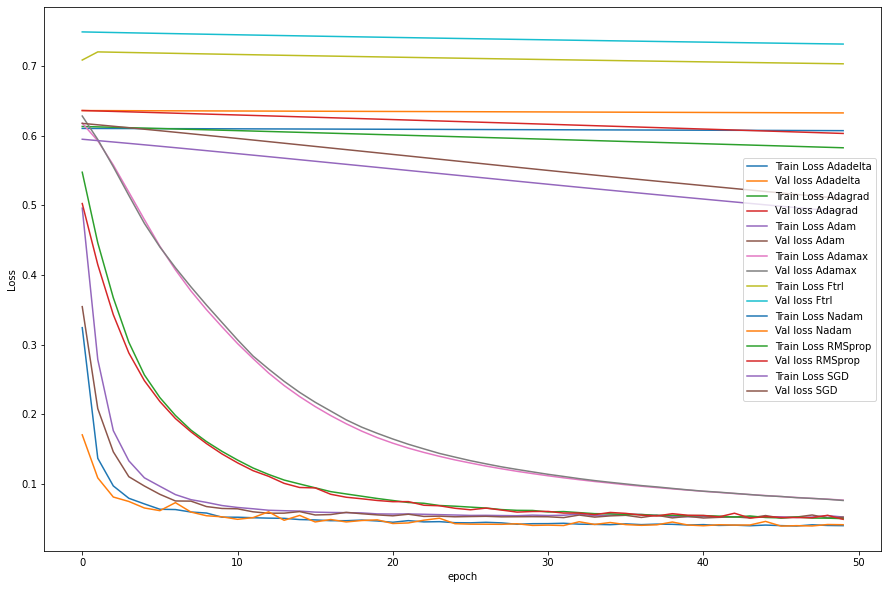

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [30]:
results

{'Adadelta': {'loss': 0.6071637272834778, 'val_loss': 0.6326116323471069},
 'Adagrad': {'loss': 0.5825908780097961, 'val_loss': 0.6031497120857239},
 'Adam': {'loss': 0.052604369819164276, 'val_loss': 0.052333682775497437},
 'Adamax': {'loss': 0.07688573747873306, 'val_loss': 0.07636307924985886},
 'Ftrl': {'loss': 0.7031053304672241, 'val_loss': 0.7314333915710449},
 'Nadam': {'loss': 0.04021112620830536, 'val_loss': 0.04156115651130676},
 'RMSprop': {'loss': 0.05028463900089264, 'val_loss': 0.0493352897465229},
 'SGD': {'loss': 0.4906328618526459, 'val_loss': 0.5095024108886719}}

In [31]:
results2mse=0.0536031574010849

En cuanto al optimizador se seleccionaria el nadam para mae y adam para mse ya que obtiene mejor desempeño en validación. 
Inicialmente se corre el modelo con 50 epocas y funciona bien, principalmente con la metrica mse en cual se logra estabilidad para el optimizador seleccionado. 

El mejor desempeño es: results2mse=0.0536031574010849 para MSE y results2mae=0.004058503080159426 para MAE

De igual manera vemos que no hay overfiftin ya que los valores de loss en training y test son similares. 

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [32]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(dims,)), tf.keras.layers.Dropout(0.3),
keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dropout(0.3)])
model.compile(tf.keras.optimizers.Nadam(), loss='mae', metrics=['mse'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
callbacks2 = [keras.callbacks.ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)]
model.fit(X_train, Y_train,
                    epochs=EPOCHS2, batch_size=1, callbacks=[callback,callbacks2],
                    verbose=0)
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: loss improved from inf to 0.48185, saving model to best_model.h5

Epoch 2: loss improved from 0.48185 to 0.35392, saving model to best_model.h5

Epoch 3: loss improved from 0.35392 to 0.32027, saving model to best_model.h5

Epoch 4: loss improved from 0.32027 to 0.30027, saving model to best_model.h5

Epoch 5: loss improved from 0.30027 to 0.29057, saving model to best_model.h5

Epoch 6: loss improved from 0.29057 to 0.28497, saving model to best_model.h5

Epoch 7: loss improved from 0.28497 to 0.28123, saving model to best_model.h5

Epoch 8: loss improved from 0.28123 to 0.27383, saving model to best_model.h5

Epoch 9: loss improved from 0.27383 to 0.26843, saving model to best_model.h5

Epoch 10: loss improved from 0.26843 to 0.26605, saving model to best_model.h5

Epoch 11: loss improved from 0.26605 to 0.26292, saving model to best_model.h5

Epoch 12: loss improved from 0.26292 to 0.26253, saving model to best_model.h5

Epoch 13: loss improved from 0.26253 to 0.25854, sav

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(dims,)), tf.keras.layers.Dropout(0.3),
keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dropout(0.3)])
model.compile(tf.keras.optimizers.Nadam(), loss='mae', metrics=['mse'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
callbacks2 = [keras.callbacks.ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)]
model.fit(X_train, Y_train,
                    epochs=EPOCHS2, batch_size=1, callbacks=[callback,callbacks2],
                    verbose=0)
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
_, test_mae3 = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: loss improved from inf to 0.48265, saving model to best_model.h5

Epoch 2: loss improved from 0.48265 to 0.35371, saving model to best_model.h5

Epoch 3: loss improved from 0.35371 to 0.32238, saving model to best_model.h5

Epoch 4: loss improved from 0.32238 to 0.30269, saving model to best_model.h5

Epoch 5: loss improved from 0.30269 to 0.29179, saving model to best_model.h5

Epoch 6: loss improved from 0.29179 to 0.28553, saving model to best_model.h5

Epoch 7: loss improved from 0.28553 to 0.27824, saving model to best_model.h5

Epoch 8: loss improved from 0.27824 to 0.27565, saving model to best_model.h5

Epoch 9: loss improved from 0.27565 to 0.26924, saving model to best_model.h5

Epoch 10: loss improved from 0.26924 to 0.26787, saving model to best_model.h5

Epoch 11: loss improved from 0.26787 to 0.26401, saving model to best_model.h5

Epoch 12: loss improved from 0.26401 to 0.25839, saving model to best_model.h5

Epoch 13: loss did not improve from 0.25839

Epoch 1

In [34]:


# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(dims,)), tf.keras.layers.Dropout(0.3),
keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dropout(0.3)])
model.compile(tf.keras.optimizers.Nadam(), loss='mse', metrics=['mae'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
callbacks2 = [keras.callbacks.ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)]
model.fit(X_train, Y_train,
                    epochs=EPOCHS2, batch_size=1, callbacks=[callback,callbacks2],
                    verbose=0)
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
_, test_mse3 = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: loss improved from inf to 0.29973, saving model to best_model.h5

Epoch 2: loss improved from 0.29973 to 0.20271, saving model to best_model.h5

Epoch 3: loss improved from 0.20271 to 0.18969, saving model to best_model.h5

Epoch 4: loss improved from 0.18969 to 0.18168, saving model to best_model.h5

Epoch 5: loss improved from 0.18168 to 0.17386, saving model to best_model.h5

Epoch 6: loss did not improve from 0.17386

Epoch 7: loss did not improve from 0.17386

Epoch 8: loss improved from 0.17386 to 0.17156, saving model to best_model.h5

Epoch 9: loss did not improve from 0.17156

Epoch 10: loss improved from 0.17156 to 0.16937, saving model to best_model.h5

Epoch 11: loss improved from 0.16937 to 0.16921, saving model to best_model.h5

Epoch 12: loss did not improve from 0.16921

Epoch 13: loss improved from 0.16921 to 0.16692, saving model to best_model.h5

Epoch 14: loss did not improve from 0.16692

Epoch 15: loss did not improve from 0.16692

Epoch 16: loss did not

De acuerdo al punto anterior, se usa el optimizador Nadam ya que fue el de mejor desempeño para el modelo multicapa, se incluye dropout igual a 0.3 ya que es el que recomiendo la literatura consultada, en cuanto al early stoping se usa una patience de 3 en el cual se espera que la funcion de perdida mejore o que se detenga. Encontramos que para el loss = mae se detiene en la epoca 24, logrando en test un desempeño de 0.052. Cuando se usa la funcion de perdida mse se detiene en la epoca 13 con un resultado de 0.218.

## Punto 4 - Comparación y análisis de resultados
En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

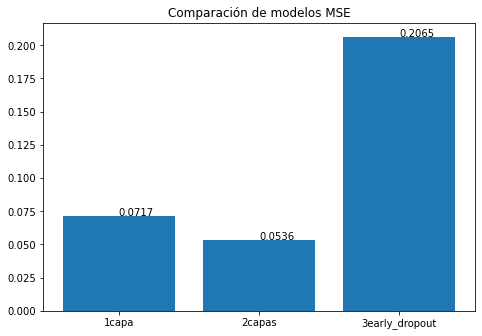

In [35]:
# Celda 4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MSE")
ejeX = ['1capa','2capas', '3early_dropout']
ejeY = [results1mse,results2mse,test_mse3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 4),round(y[i], 4))
addlabels(ejeX,ejeY,plt)
plt.show()

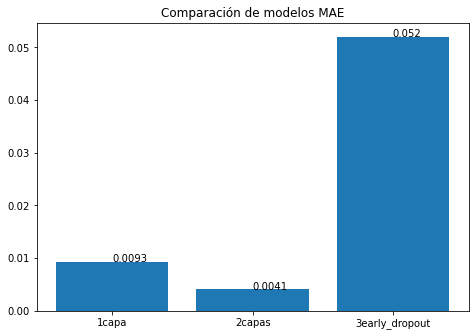

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MAE")
ejeX = ['1capa','2capas', '3early_dropout']
ejeY = [results1mae,results2mae,test_mae3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 4),round(y[i], 4))
addlabels(ejeX,ejeY,plt)
plt.show()

En conclusión el mejor modelo es aquel que tiene dos capas ocultas y no tiene Early stoping o dropout, el optimizador con mejor desempeño es NADAM para MAE y ADAM con la métrica MSE. Este modelo tiene resultados estables en un numero de epocas pequeño (20 - 30 ) lo cual lo hace eficiente. 
El peor modelo fue con earlystoping ya que la salida se da antes de que converja hacia los minimos valores de MAE y MSE. Consideramos que el Droupout = 0.3 no es indicado para estos datos, Se podria ejecutar un grid search para calibrar este metodo/parametro. Tambien podria dejarse un patience mas alto para no salga tan rápido. 